# 无监督预训练
给定文本序列，w = w1w2w3...，GPT首先将文本映射为向量
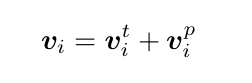
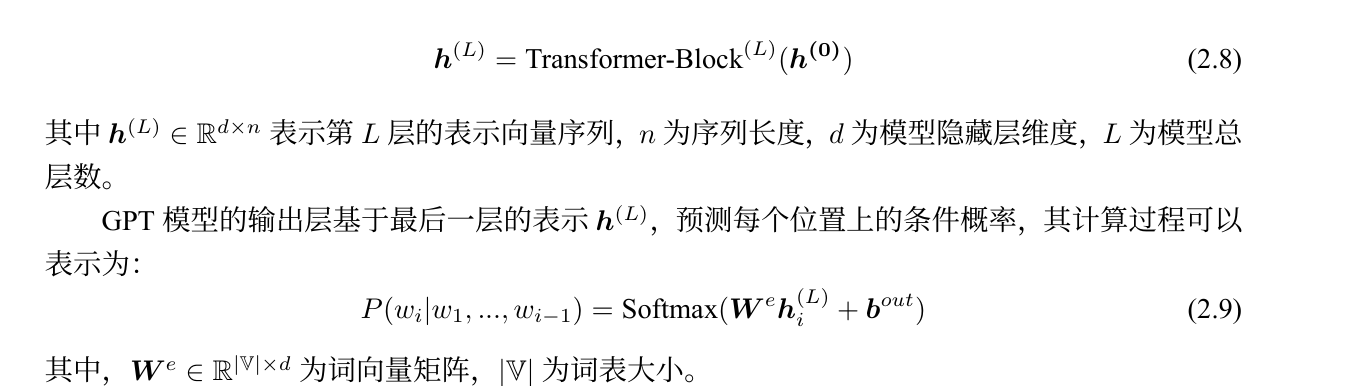

In [4]:
from datasets import load_dataset,concatenate_datasets

In [6]:
bookcorpus = load_dataset("ag_news",split="train",cache_dir='../data/ag_news')

# wiki = load_dataset("wikipedia",split="20230601.en",cache_dir='../data/wikipedia')
# 仅保留text的列
# wiki = wiki.remove_column([col for col in wiki.column_names if col != 'text'])

# dataset = concatenate_datasets([bookcorpus,wiki])

# 将数据切分为训练集和验证集
d = bookcorpus.train_test_split(test_size=0.1)


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [7]:
# 将训练集和测试集保存到本地文件中
def dataset_to_text(dataset,output_filename='../data/data.txt'):
    with open(output_filename,'w') as f:
        for t in dataset['text']:
            print(t,file=f)

# save
dataset_to_text(d['train'],'../data/train.txt')
dataset_to_text(d['test'],'../data/test.txt')

# 训练词元分析器（Tokenizer）
WordPiece根据词频决定是否将一个完整的次切分为多个词元

In [12]:

from transformers import BertTokenizerFast


special_token = ['[PAD]','[UNK]','[CLS]','[SEP]','[MASK]','<T>','<S>']

files = ['../data/train.txt']

vocab_size = 30522

max_length = 512

# 是否要及进行截断
truncate_longer_sampler = True

tokenizer = BertTokenizerFast.from_pretrained("google-bert/bert-base-uncased")

tokenizer.train()

ImportError: cannot import name 'BertWordPieceTokenizer_default' from 'transformers' (d:\anaconda\envs\llm\lib\site-packages\transformers\__init__.py)